In [32]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [34]:
X_train.shape

(60000, 28, 28)

In [44]:
X_train_flattened = X_train.reshape(60000,784)

In [36]:
X_test_flattened = X_test.reshape(10000,784)

(<matplotlib.image.AxesImage at 0x7fa7945ea1f0>, 1)

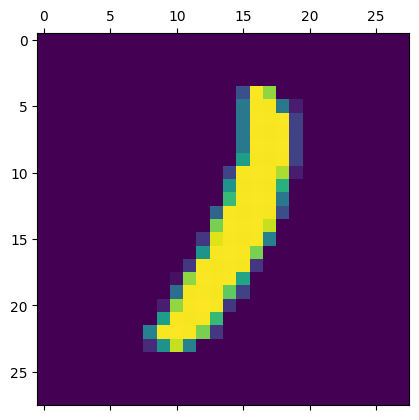

In [37]:
a = 78
plt.matshow(X_train[a]), y_train[a]

In [38]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.6055 - accuracy: 0.8420
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 6.1160 - accuracy: 0.8785
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.7420 - accuracy: 0.8818
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.6205 - accuracy: 0.8836
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4302 - accuracy: 0.8866


In [45]:
X_train_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train_flattened)


X_train_transformed = scaler.transform(X_train_flattened)

In [47]:
model.fit(X_train_transformed,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2902 - accuracy: 0.8408
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8970 - accuracy: 0.8742
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6175 - accuracy: 0.8857
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4514 - accuracy: 0.8971
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3600 - accuracy: 0.9064


In [60]:
X_test_transformed = scaler.transform(X_test_flattened)
model.evaluate(X_test_transformed,y_test)
y_predicted = model.predict(X_test_transformed)

313/313 [==============================] - 0s 2ms/step


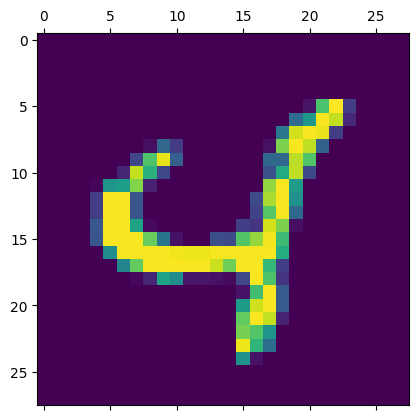

In [61]:
a=67
plt.matshow(X_test[a])

In [62]:
np.argmax(y_predicted[a])

4